Dicision Tree Task

### 약물 A, B, C, X, Y
##### 다중 분류(Multiclass Classification)
- 의학 연구원으로서 동일한 질병을 앓고 있는 일련의 환자에 대한 데이터를 수집했다.
- 치료 과정 동안 각 환자는 5가지 약물, 즉 약물 A, 약물 B, 약물 c, 약물 x 및 y 중 하나에 반응했다.
-  미래에 동일한 질병을 앓는 환자에게 어떤 약물이 적합할 수 있는지 알아보기 위한 모델을 구축한다.

In [1]:
import pandas as pd

# sex / M:0 F:1
# BP / 

drug = pd.read_csv('./dataset/drugs.csv')
drug['Sex'] = drug['Sex'].replace({'M': 0, 'F': 1})
drug['BP'] = drug['BP'].replace({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
drug['Cholesterol'] = drug['Cholesterol'].replace({ 'NORMAL': 0, 'HIGH': 1})
drug['Drug'] = drug['Drug'].replace({'drugA': 0, 'drugB': 1, 'drugC': 2,'drugX': 4,'drugY': 5 })
# drug['Na_to_K'] = drug['Na_to_K'].astype(int)
# drug.drop('Age', axis=1, inplace=True)  # inplace=True로 설정하여 원본 데이터프레임을 수정합니다.
# drug.drop('Na_to_K', axis=1, inplace=True)  # inplace=True로 설정하여 원본 데이터프레임을 수정합니다.
drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,5
1,47,0,0,1,13.093,2
2,47,0,0,1,10.114,2
3,28,1,1,1,7.798,4
4,61,1,0,1,18.043,5
...,...,...,...,...,...,...
195,56,1,0,1,11.567,2
196,16,0,0,1,12.006,2
197,52,0,1,1,9.894,4
198,23,0,1,0,14.020,4


In [ ]:
from sklearn.preprocessing import LabelEncoder

drug_enc_df = drug.copy()

drug_encoder = LaberEncoder()
target = drug_encoder.fit_transform(drug_df['Drug'].tolist())
drug_enc_df['Drug'] = target

gender_encoder = LaberEncoder()
gender = drug_encoder.fit_transform(drug_df['Sex'].tolist())
gender_enc_df['Sex'] = target

drug_encoder = LaberEncoder()
target = drug_encoder.fit_transform(drug_df['Drug'].tolist())
drug_enc_df['Drug'] = target

drug_encoder = LaberEncoder()
target = drug_encoder.fit_transform(drug_df['Drug'].tolist())
drug_enc_df['Drug'] = target

drug_encoder = LaberEncoder()
target = drug_encoder.fit_transform(drug_df['Drug'].tolist())
drug_enc_df['Drug'] = target

drug_encoder = LaberEncoder()
target = drug_encoder.fit_transform(drug_df['Drug'].tolist())
drug_enc_df['Drug'] = target


drug_encoder = LabelEncoder()
gendrencoder = LabelEncoder()
blood_pressure_encoder = LabelEncoder()
choleterol_encoder = LabelEncoder()

In [ ]:
no_to_k_df['Na_to-K']

In [203]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler
std.fit_transform(na_to)

In [3]:
import numpy as np
# 학습 데이터  세트와 데이터 세트를 분리해주는 라이브러리
from sklearn.model_selection import train_test_split

feature = drug.iloc[:, :-1]
target = drug.iloc[:,-1]
feature

x_train, x_text, y_train, y_test = train_test_split(feature, target, test_size = 0.2)
# , random_state=124

In [4]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
# 훈련 시, feature(문제)에 feature_names가 있고 없고에 따라
# predict에 전달할 feature(문제)의 방향성이 달라진다.
dtc.fit(x_train.values, y_train.values)

DecisionTreeClassifier()

In [5]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test.values, dtc.predict(x_text.values))

1.0

In [6]:
from sklearn.tree import export_graphviz

# drug 데이터프레임에서 특성 열의 이름 가져오기
feature_names = drug.columns.tolist()
if 'target' in feature_names:
    feature_names.remove('target')  # target 열이 있다면 제외

# 의사 결정 트리 시각화
export_graphviz(dtc, out_file="./images/a.dot", feature_names=feature_names[:5], impurity=True, filled=True)


In [8]:
import graphviz

with open('./images/a.dot') as f:
    a = f.read()

iris_dtc01_graph = graphviz.Source(a)

In [9]:
iris_dtc01_graph.render(filename= "a", directory= "./images", format= "png")

'images\\a.png'

<img src="./images/a.png">

In [55]:
import pandas as pd


# drug 데이터프레임 생성
drug = pd.DataFrame(drug)

# 데이터프레임의 열 이름 확인
feature_names = drug.columns.tolist()[:-1]
print(dtc.feature_importances_)

[0.15268633 0.         0.33732914 0.04298562 0.46699892]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


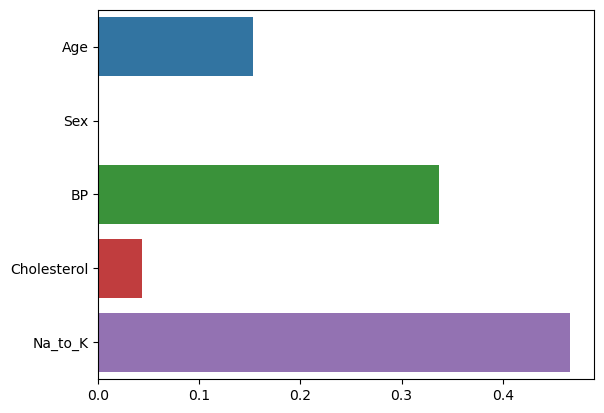

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
drug = pd.DataFrame(drug)
sns.barplot(x=dtc.feature_importances_, y=feature_names)
plt.show()

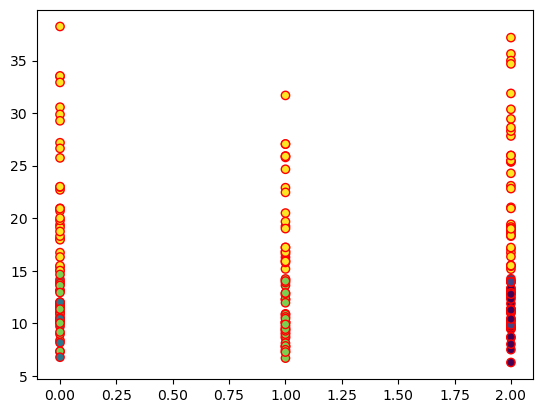

In [66]:
drug


plt.scatter(drug['BP'], drug['Na_to_K'], c=drug['Drug'], edgecolor='r' )


In [67]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

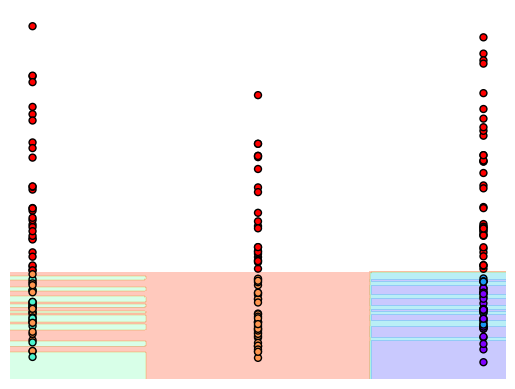

In [72]:
features = drug[['BP', 'Na_to_K']].values
targets = drug['Drug']

dtc = DecisionTreeClassifier(random_state=124)
dtc.fit(features, targets)
visualize_boundary(dtc, features, targets)

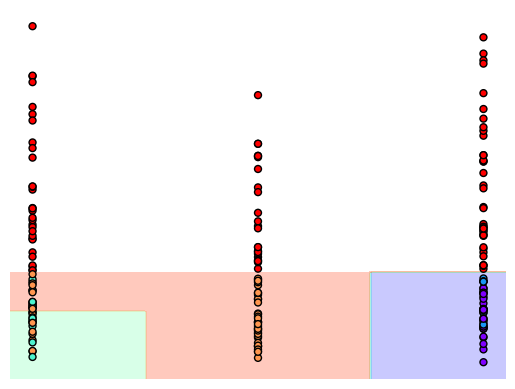

In [83]:
dtc = DecisionTreeClassifier(random_state=124, min_samples_leaf=17)
dtc.fit(features, targets)
visualize_boundary(dtc, features, targets)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,5
1,47,0,0,1,13.093,2
2,47,0,0,1,10.114,2
3,28,1,1,1,7.798,4
4,61,1,0,1,18.043,5
...,...,...,...,...,...,...
195,56,1,0,1,11.567,2
196,16,0,0,1,12.006,2
197,52,0,1,1,9.894,4
198,23,0,1,0,14.020,4


In [202]:
# import numpy as np
# # 학습 데이터  세트와 데이터 세트를 분리해주는 라이브러리
# from sklearn.model_selection import train_test_split

# feature = drug.iloc[:, :-1]
# target = drug.iloc[:,-1]
# feature

# x_train, x_text, y_train, y_test = train_test_split(feature, target, test_size = 0.2)
# # , random_state=124
# from sklearn.tree import DecisionTreeClassifier

# dtc = DecisionTreeClassifier()
# # 훈련 시, feature(문제)에 feature_names가 있고 없고에 따라
# # predict에 전달할 feature(문제)의 방향성이 달라진다.
# dtc.fit(x_train.values, y_train.values)
# from sklearn.metrics import accuracy_score

# accuracy_score(y_test.values, dtc.predict(x_text.values))

0.975